In [1]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
path = os.path.realpath(os.path.join(os.getcwd(),'../'))
sys.path.insert(0, path)
import astro_datasets

/Users/adammoss/opt/anaconda3/envs/astro_datasets/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
drop_fraction = 0.5

In [4]:
def augment(*data):
    inputs, label = data
    static, times, values, measurements, lengths = inputs[0:5]
    drop_condition = tf.random.uniform(tf.shape(measurements)) < \
                tf.ones(tf.shape(measurements), dtype=tf.float32) * tf.random.uniform(shape=(1,), minval=0, maxval=drop_fraction)
    measurements = tf.where(
        drop_condition,
        tf.cast(tf.zeros(tf.shape(measurements)), dtype=tf.bool),
        measurements
    )
    return (static, times, values, measurements) + inputs[4:], label

In [5]:
def preprocess(*data):
    inputs, label = data
    static, times, values, measurements, lengths = inputs[0:5]
    times = times - times[0]
    return (static, times, values, measurements) + inputs[4:], label

In [6]:
def test_dataset(name, split, builder_kwargs={}):
    ds, info = tfds.load(name=name, split=split, with_info=True, as_supervised=True, builder_kwargs=builder_kwargs)
    ds = ds.map(augment)
    ds = ds.map(preprocess)
    print(info)
    for d in ds.take(2):
        inputs, label = d
        static, times, values, measurements, lengths, static_errors, value_errors = inputs
        plt.figure(figsize=(6, 2))
        print(static, label)
        plt.pcolormesh(times, np.arange(int(values.shape[1])), values.numpy().T)
        plt.show()

2022-07-07 10:52:42.075165: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


tfds.core.DatasetInfo(
    name='spcc',
    full_name='spcc/1.0.10',
    description="""
    
    """,
    homepage='https://www.tensorflow.org/datasets/catalog/spcc',
    data_path='/Users/adammoss/tensorflow_datasets/spcc/1.0.10',
    file_format=tfrecord,
    download_size=26.38 MiB,
    dataset_size=28.53 MiB,
    features=FeaturesDict({
        'metadata': FeaturesDict({
            'object_id': tf.uint32,
            'redshift': tf.float32,
        }),
        'static': Tensor(shape=(2,), dtype=tf.float32),
        'static_errors': Tensor(shape=(2,), dtype=tf.float32),
        'targets': FeaturesDict({
            'class': ClassLabel(shape=(), dtype=tf.int64, num_classes=8),
            'sn1a': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        }),
        'time': Tensor(shape=(None,), dtype=tf.float32),
        'value_errors': Tensor(shape=(None, 4), dtype=tf.float32),
        'values': Tensor(shape=(None, 4), dtype=tf.float32),
    }),
    supervised_keys=('combined',

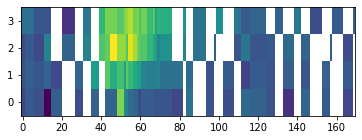

tf.Tensor([0.2622 0.0713], shape=(2,), dtype=float32) tf.Tensor(0, shape=(), dtype=int64)


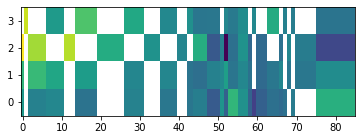

2022-07-07 10:52:42.619452: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [7]:
test_dataset('spcc', 'train', builder_kwargs={'default_target': 'sn1a'})

tfds.core.DatasetInfo(
    name='spcc',
    full_name='spcc/1.0.10',
    description="""
    
    """,
    homepage='https://www.tensorflow.org/datasets/catalog/spcc',
    data_path='/Users/adammoss/tensorflow_datasets/spcc/1.0.10',
    file_format=tfrecord,
    download_size=26.38 MiB,
    dataset_size=28.53 MiB,
    features=FeaturesDict({
        'metadata': FeaturesDict({
            'object_id': tf.uint32,
            'redshift': tf.float32,
        }),
        'static': Tensor(shape=(2,), dtype=tf.float32),
        'static_errors': Tensor(shape=(2,), dtype=tf.float32),
        'targets': FeaturesDict({
            'class': ClassLabel(shape=(), dtype=tf.int64, num_classes=8),
            'sn1a': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        }),
        'time': Tensor(shape=(None,), dtype=tf.float32),
        'value_errors': Tensor(shape=(None, 4), dtype=tf.float32),
        'values': Tensor(shape=(None, 4), dtype=tf.float32),
    }),
    supervised_keys=('combined',

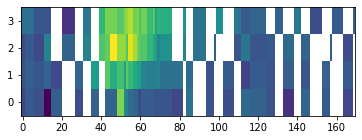

tf.Tensor([0.2622 0.0713], shape=(2,), dtype=float32) tf.Tensor(7, shape=(), dtype=int64)


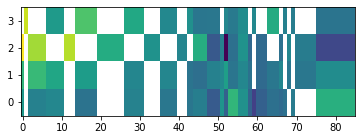

2022-07-07 10:52:42.967119: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [8]:
test_dataset('spcc', 'train')

tfds.core.DatasetInfo(
    name='plasticc',
    full_name='plasticc/1.0.10',
    description="""
    
    """,
    homepage='https://zenodo.org/record/2539456#.XzsWWxNKibs',
    data_path='/Users/adammoss/tensorflow_datasets/plasticc/1.0.10',
    file_format=tfrecord,
    download_size=312.53 MiB,
    dataset_size=244.56 MiB,
    features=FeaturesDict({
        'metadata': FeaturesDict({
            'object_id': tf.uint32,
            'redshift': tf.float32,
        }),
        'static': Tensor(shape=(3,), dtype=tf.float32),
        'static_errors': Tensor(shape=(3,), dtype=tf.float32),
        'targets': FeaturesDict({
            'class': ClassLabel(shape=(), dtype=tf.int64, num_classes=15),
            'sn1a': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        }),
        'time': Tensor(shape=(None,), dtype=tf.float32),
        'value_errors': Tensor(shape=(None, 6), dtype=tf.float32),
        'values': Tensor(shape=(None, 6), dtype=tf.float32),
    }),
    supervised_keys

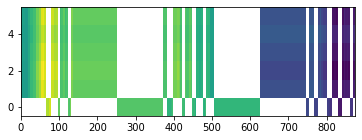

tf.Tensor([0.    0.027 0.   ], shape=(3,), dtype=float32) tf.Tensor(8, shape=(), dtype=int64)


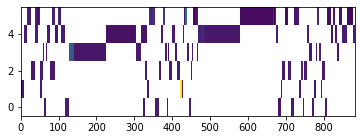

2022-07-07 10:52:43.307707: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [9]:
test_dataset('plasticc', 'train')